# A Comprehensive Analysis of SAT Performance in NYC Public Schools

Annually, American high school students undergo the standardized Scholastic Assessment Test (SAT), designed to assess their proficiency in literacy, numeracy, and writing skills. Comprising three sections – reading, math, and writing – each segment carries a maximum score of 800 points. These assessments bear significant importance for both students and colleges, serving as a crucial factor in the college admissions process.

The analysis of school performance holds substantial relevance for various stakeholders, including education professionals, policymakers, researchers, government entities, and parents making informed decisions about their children's educational institutions.

As part of this analytical endeavor, you have been provided with a dataset named "schools.csv," a preview of which is presented below. Your specific mandate involves addressing three pivotal inquiries pertaining to the SAT performance of public schools in New York City (NYC).

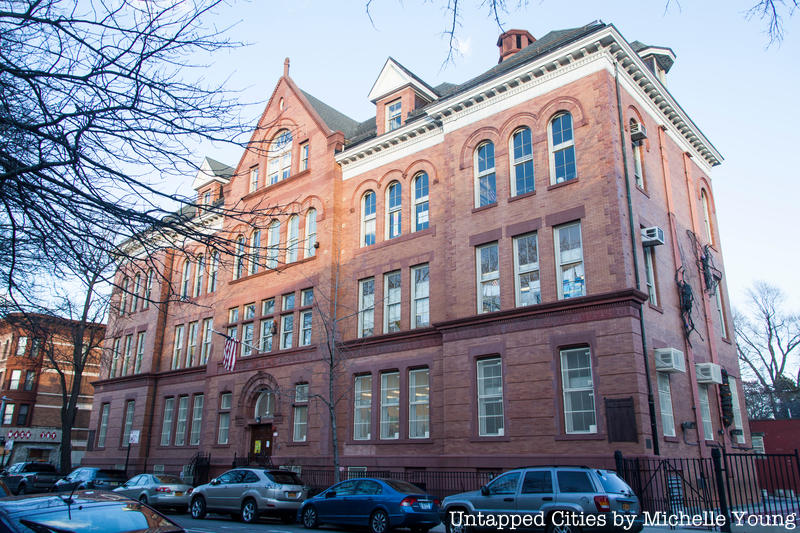

In [1]:
# import necessary library
import pandas as pd

# Read the data
df = pd.read_csv('schools.csv')

# preview the data
df

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


# Task

## 1 Finding Missing Values  

It appears that the initial school in our database lacks information in the percent_tested column.

Let's determine the number of schools with missing data in this column, indicating instances where schools did not provide information regarding the percentage of students who underwent testing.

In [2]:
df.isna().sum()


school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

In [3]:
missing_values = df.isna().sum().percent_tested

missing_values

20

In [4]:
print(f"Within this dataset, there are a total of {missing_values} missing values")

Within this dataset, there are a total of 20 missing values


## 2. How Many Schools Are There?

A total of 20 schools lack information in the percent_tested column, constituting only 5% of the entire database.

Now, let's shift our focus to determine the number of schools. Upon examining the initial ten rows of the database, it became apparent that several entries shared the same value in the building_code column, indicating the presence of multiple schools situated in identical locations. Let's ascertain the count of distinct school locations present in our database.

In [5]:
unique_school = df['building_code'].nunique()

In [6]:
print(f"The existing school data shows that there are {unique_school} schools that have building codes that are different from each other")

The existing school data shows that there are 233 schools that have building codes that are different from each other


## 3. Best Schools in Math

Generate a pandas DataFrame named "best_math_schools" that includes the "school_name" and "average_math" scores for schools achieving at least 80% of the maximum possible score. Ensure the DataFrame is sorted in descending order based on the "average_math" column.


In [7]:
threshold = 0.8 * 800
threshold

640.0

In [8]:
school_candidate = df[df["average_math"] >= threshold]

best_math_school = school_candidate[["school_name","average_math"]].sort_values(by="average_math", ascending = False)
best_math_school

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


### Create visualization for top School in Math

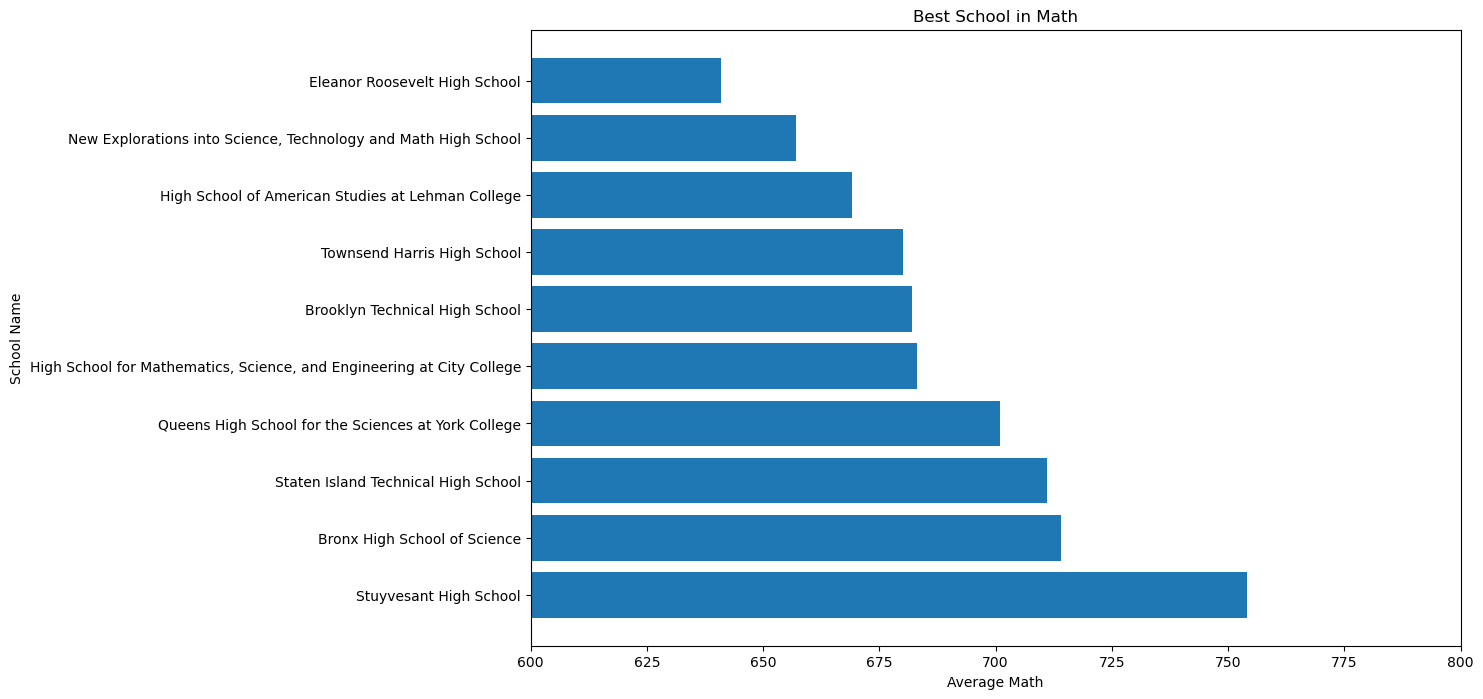

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(best_math_school['school_name'], best_math_school['average_math'])
plt.title("Best School in Math")
plt.ylabel("School Name")
plt.xlabel("Average Math")
plt.xlim(600,800)
plt.show()

## 4. Top 10 School

Identify the top 10 performing schools by aggregating scores across all three SAT sections. Create a pandas DataFrame named "top_10_schools" containing the school names and a column named "total_SAT." Sort the results by the "total_SAT" column in descending order.


In [10]:
df["total_SAT"] = df["average_math"] + df["average_reading"] + df["average_writing"]

In [11]:
top_school = df[["school_name","total_SAT"]].sort_values(by="total_SAT", ascending = False)[:10]
top_school = pd.DataFrame(top_school).reset_index()
top_school

,index,school_name,total_SAT
0,88,Stuyvesant High School,2144
1,170,Bronx High School of Science,2041
2,93,Staten Island Technical High School,2041
3,174,High School of American Studies at Lehman College,2013
4,333,Townsend Harris High School,1981
5,365,Queens High School for the Sciences at York Co...,1947
6,5,Bard High School Early College,1914
7,280,Brooklyn Technical High School,1896
8,45,Eleanor Roosevelt High School,1889
9,68,"High School for Mathematics, Science, and Engi...",1889


### Create Visualization for The top 10 Schools

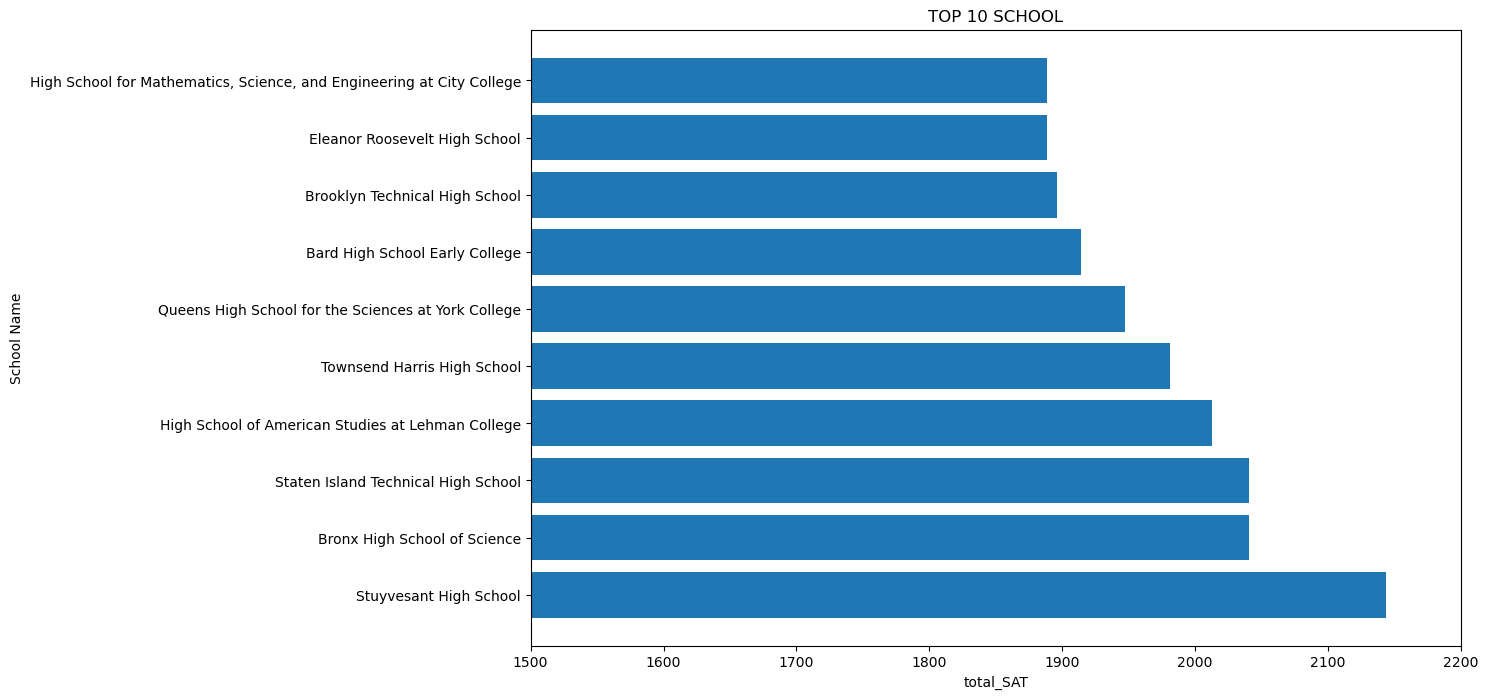

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(top_school['school_name'], top_school['total_SAT'])
plt.title("TOP 10 SCHOOL")
plt.ylabel("School Name")
plt.xlabel("total_SAT")
plt.xlim(1500,2200)
plt.show()

### Another Way

In [13]:
df.groupby("school_name")["total_SAT"].agg('sum').sort_values(ascending = False)[:10]

school_name
Stuyvesant High School                                                   2144
Staten Island Technical High School                                      2041
Bronx High School of Science                                             2041
High School of American Studies at Lehman College                        2013
Townsend Harris High School                                              1981
Queens High School for the Sciences at York College                      1947
Bard High School Early College                                           1914
Brooklyn Technical High School                                           1896
Eleanor Roosevelt High School                                            1889
High School for Mathematics, Science, and Engineering at City College    1889
Name: total_SAT, dtype: int64

## 5. Finding Insight with Statistics

Determine the NYC borough with the highest standard deviation for "total_SAT" scores. Save the results in a DataFrame named "largest_std_dev" with "borough" as the index. Include three columns: "num_schools" for the number of schools in the borough, "average_SAT" for the mean of "total_SAT," and "std_SAT" for the standard deviation of "total_SAT." Round all numerical values to two decimal places.

In [26]:
largest_std_dev = df.groupby("borough")["total_SAT"].agg(['count','mean','std']).sort_values(by='mean', ascending=False)


# sort_values(ascending = False)
# largest_std_dev = pd.DataFrame(largest_std_dev)
# Semakin besar standard deviasi maka keberanergamaannya semakin tinggi

largest_std_dev

,count,mean,std
borough,,,
Staten Island,10,1439.000000,222.303596
Queens,69,1345.478261,195.252899
Manhattan,89,1340.134831,230.294140
Brooklyn,109,1230.256881,154.868427
Bronx,98,1202.724490,150.393901


### Find the Distribution of each Borough

Kernel Density Distribution (KDE) is a statistical method employed to estimate the probability density function of Total SAT Scores across different boroughs. This analysis provides a nuanced understanding of the distribution of SAT scores, offering insights into the concentration and variability within each borough.

The KDE process involves placing a probability density kernel, often in the form of a Gaussian curve, at each data point representing Total SAT Scores. The kernels are then summed to create a smooth estimate of the probability density function for each borough. The bandwidth parameter controls the width of the kernels, influencing the level of detail in the estimation.

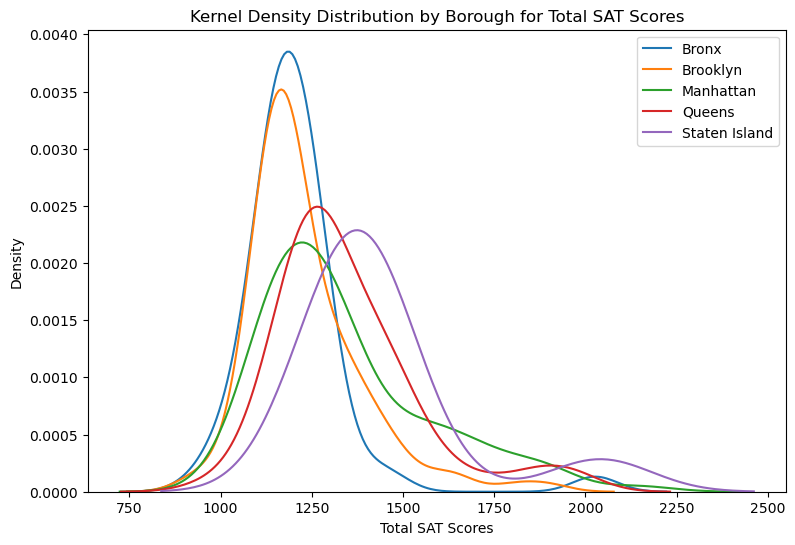

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
df["total_SAT"] = df["average_math"] + df["average_reading"] + df["average_writing"]
largest_std_dev = df.groupby("borough")["total_SAT"].agg('std')

# Create a Seaborn KDE plot
plt.figure(figsize=(9, 6))

# Plot kernel density for each borough using the 'total_SAT' from the DataFrame
for borough in largest_std_dev.index:
    sns.kdeplot(df[df["borough"] == borough]["total_SAT"], label=borough)

plt.title('Kernel Density Distribution by Borough for Total SAT Scores')
plt.xlabel('Total SAT Scores')
plt.ylabel('Density')
plt.legend()
plt.show()


A Box Plot, also known as a box-and-whisker plot, is a powerful graphical tool for visualizing the distribution and statistical summary of Total SAT Scores across various boroughs. This method provides a clear and concise representation of the central tendency, spread, and potential outliers within each borough's SAT score data.

By employing Box Plots to visualize Total SAT Scores by Borough, one can quickly discern the distributional characteristics and compare the central tendencies and variabilities between different areas. Outliers, if present, are easily identified, shedding light on boroughs with exceptional or concerning SAT score patterns.

<Axes: xlabel='total_SAT', ylabel='borough'>

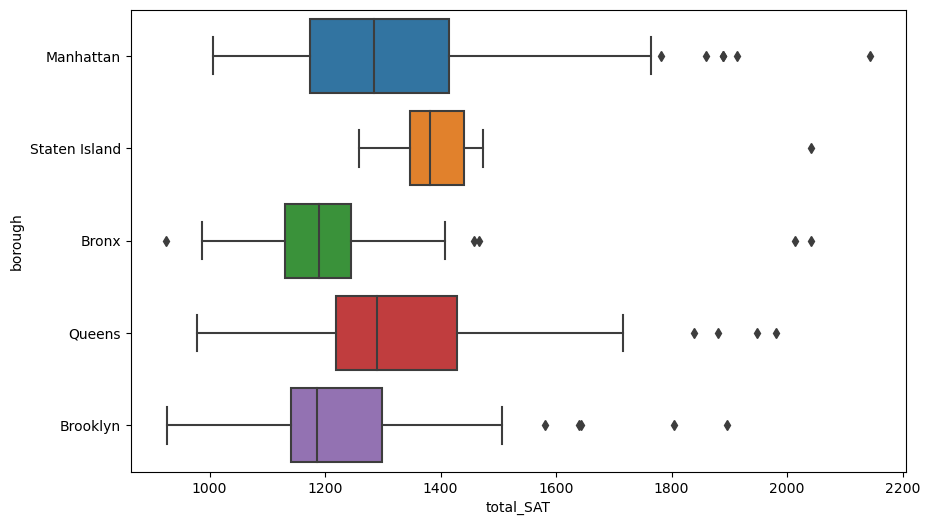

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x="total_SAT", y="borough", data=df)